In [ ]:
9. Uber Ride Price Prediction using PCA and EDA: Dataset can be change(iris dataset)
● Perform Exploratory Data Analysis (EDA) on Uber ride data
● Use Principal Component Analysis (PCA) to reduce dimensionality
● Compare the performance of models with and without PCA
10. Uber Ride Price Prediction using PCA and EDA: Dataset can be change(iris dataset)
● Perform Exploratory Data Analysis (EDA) on Uber ride data
● Use Principal Component Analysis (PCA) to reduce dimensionality
● Evaluate models using metrics like R², RMSE, MAE 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


In [5]:
data=pd.read_csv("uber - uber.csv",encoding='latin-1')
data.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
data.shape

(200000, 9)

In [9]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [13]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [15]:
data=data.drop(['Unnamed: 0','key'],axis=1)

data=data.dropna()

data.isnull().sum()



fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])


In [18]:
data['pickup_datetime'].head(10)

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
5   2011-02-12 02:27:09+00:00
6   2014-10-12 07:04:00+00:00
7   2012-12-11 13:52:00+00:00
8   2012-02-17 09:32:00+00:00
9   2012-03-29 19:06:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [19]:
data['hour']=data["pickup_datetime"].dt.hour
data['day']=data["pickup_datetime"].dt.day
data['month']=data["pickup_datetime"].dt.month
data['year']=data["pickup_datetime"].dt.year
data['weekday']=data["pickup_datetime"].dt.weekday

data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,13.491387,15.704739,6.281791,2011.742434,3.048435
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,6.515505,8.687377,3.438933,1.856400,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


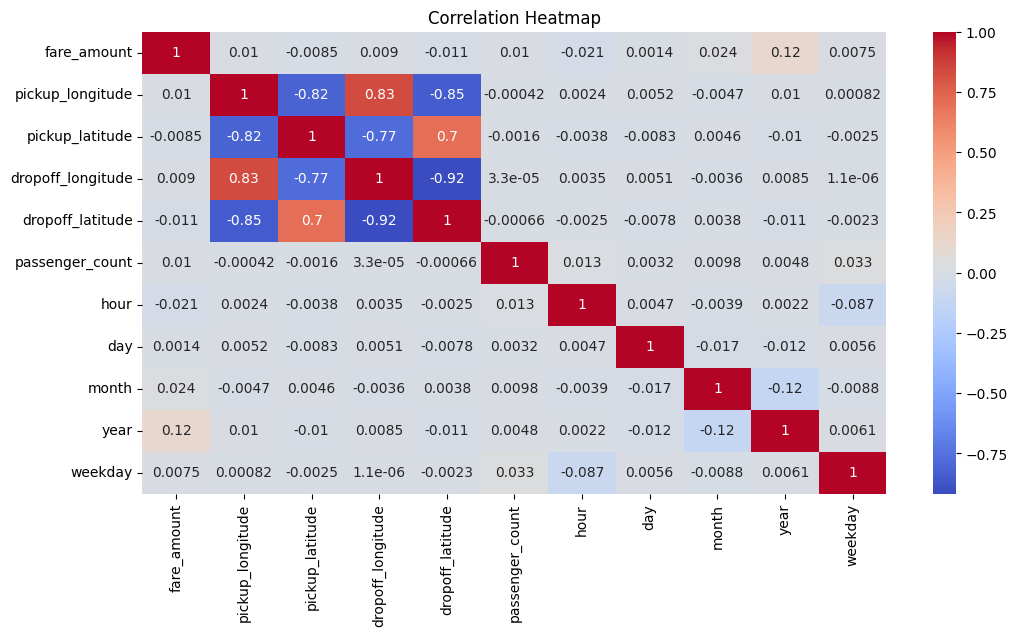

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



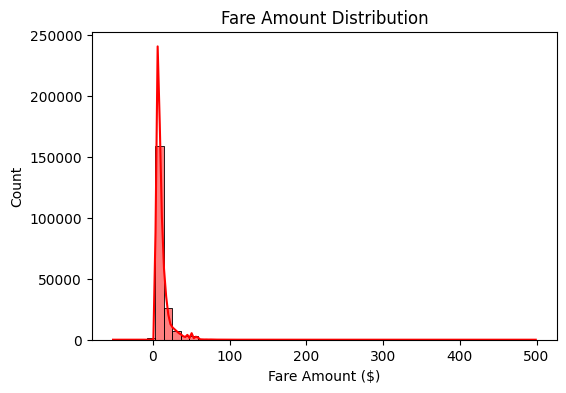

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(data['fare_amount'],bins=50,kde=True,color="red")
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Count")
plt.show()



C:\Users\mehul\AppData\Local\Temp\ipykernel_28280\4220429717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count',data=data,palette='viridis')


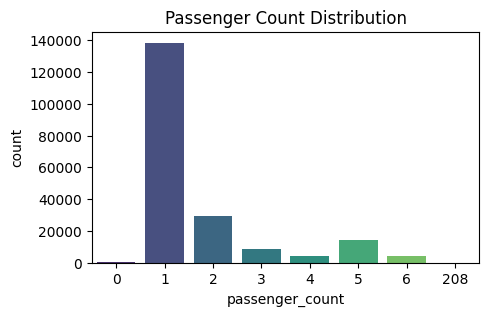

In [27]:
plt.figure(figsize=(5,3))
sns.countplot(x='passenger_count',data=data,palette='viridis')
plt.title("Passenger Count Distribution")
plt.show()



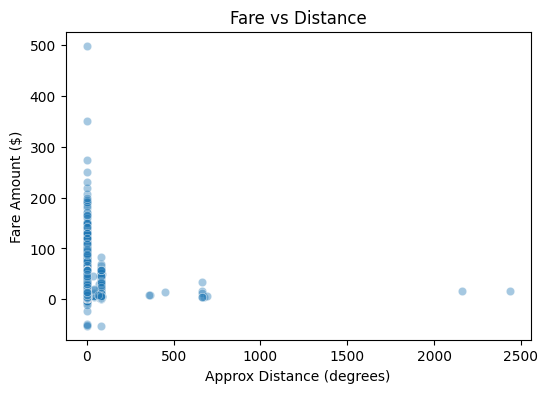

In [29]:
data['distance']=np.sqrt(
    (data['dropoff_latitude']-data['pickup_latitude'])**2+
    (data['dropoff_longitude'] - data['pickup_longitude'])**2
)


plt.figure(figsize=(6,4))
sns.scatterplot(x='distance', y='fare_amount', data=data, alpha=0.4)
plt.title("Fare vs Distance")
plt.xlabel("Approx Distance (degrees)")
plt.ylabel("Fare Amount ($)")
plt.show()



In [31]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'weekday', 'distance'],
      dtype='object')

In [37]:
data=data[(data['fare_amount']>0) & (data['distance']<5)]

In [41]:
data.shape

(199540, 13)

In [45]:
X=data[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'weekday', 'distance']]
y=data['fare_amount']

scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.2,random_state=42)

lr_nopca=LinearRegression()
lr_nopca.fit(X_train,y_train)
y_pred=lr_nopca.predict(X_test)


In [61]:

mse_manual = np.mean((y_test - y_pred) ** 2)
rmse_pca = np.sqrt(mse_manual)

ss_res = np.sum((y_test - y_pred) ** 2)           
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2) 
r2_pca = 1 - (ss_res / ss_tot)

print("Model Without PCA:")
print("RMSE:", round(rmse_pca, 4))
print("R² Score:", round(r2_pca, 4))


Model Without PCA:
RMSE: 5.9134
R² Score: 0.6299


In [57]:


pca=PCA(n_components=8)
X_pca=pca.fit_transform(X_Scaled)


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_pca=lr_pca.predict(X_test_pca)




In [59]:

mse_manual = np.mean((y_test_pca - y_pred_pca) ** 2)
rmse_pca = np.sqrt(mse_manual)


ss_res = np.sum((y_test_pca - y_pred_pca) ** 2)           # residual sum of squares
ss_tot = np.sum((y_test_pca - np.mean(y_test_pca)) ** 2)  # total sum of squares
r2_pca = 1 - (ss_res / ss_tot)

print("Model With PCA:")
print("RMSE:", round(rmse_pca, 4))
print("R² Score:", round(r2_pca, 4))


Model With PCA:
RMSE: 5.9559
R² Score: 0.6245


In [65]:
import numpy as np


mae_no_pca = np.mean(np.abs(y_test - y_pred))
mae_pca = np.mean(np.abs(y_test_pca - y_pred_pca))

print("MAE (Without PCA):", round(mae_no_pca, 4))
print("MAE (With PCA):", round(mae_pca, 4))


MAE (Without PCA): 2.8682
MAE (With PCA): 2.8638


In [ ]:
11. Implement a Linear Regression model to predict house prices from area, bedrooms, and location
features. Apply K-Fold Cross-Validation to validate the model. 

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [41]:
data=pd.read_csv("House.csv")
data.head()


,Area,Bedrooms,Location,Price
0,1360,2,Urban,10998707
1,4272,3,Urban,34199426
2,3592,1,Urban,28695658
3,966,6,Urban,8444717
4,4926,1,Suburban,24865588


In [43]:
data.shape

(1000, 4)

In [45]:
data.isnull().sum()

Area        0
Bedrooms    0
Location    0
Price       0
dtype: int64

In [47]:
le=LabelEncoder()
data['Location']=le.fit_transform(data['Location'])


In [51]:
data.head()

,Area,Bedrooms,Location,Price
0,1360,2,2,10998707
1,4272,3,2,34199426
2,3592,1,2,28695658
3,966,6,2,8444717
4,4926,1,1,24865588


In [55]:
X=data.drop(['Price'],axis=1)
y=data["Price"]


In [59]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X_Scaled, y, random_state=42, test_size=0.2
)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)




In [63]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Evaluation on Test Data:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 2))


 Linear Regression Evaluation on Test Data:
Mean Squared Error (MSE): 6865816490864.58
Root Mean Squared Error (RMSE): 2620270.31
R² Score: 0.93


In [69]:
# -------------------------------------------------------
# Step 6: Validate Model Accuracy using K-Fold (From Scratch)
# -------------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

k = 5  # Number of folds
n = len(X_Scaled)
fold_size = n // k
r2_scores = []
mse_scores = []

print(f"\nManual K-Fold Cross-Validation (k={k}) Results:")

for i in range(k):
    # ----------------------------------------------
    # Step 6.1: Split data manually for fold i
    # ----------------------------------------------
    start = i * fold_size
    end = (i + 1) * fold_size

    X_test = X.iloc[start:end]
    y_test = y.iloc[start:end]

    X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
    y_train = pd.concat([y.iloc[:start], y.iloc[end:]])

    # ----------------------------------------------
    # Step 6.2: Train Linear Regression model
    # ----------------------------------------------
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 6.3: Predict and Evaluate using sklearn metrics
    # ----------------------------------------------
    y_pred = model.predict(X_test)

    #mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {i+1}: MSE = {mse:.2f}, R² = {r2:.3f}")

# -------------------------------------------------------
# Step 6.4: Display average performance across folds
# -------------------------------------------------------
print("\nAverage Cross-Validation Results:")
#print(f"Mean MSE: {np.mean(mse_scores):.2f}")
print(f"Mean R² Score: {np.mean(r2_scores):.3f}")
    # ----------------------------------------------
    # Step 6.3: Predict and Evaluate using sklearn metrics
    # ----------------------------------------------



Manual K-Fold Cross-Validation (k=5) Results:
Fold 1: MSE = 6865816490864.58, R² = 0.933
Fold 2: MSE = 6865816490864.58, R² = 0.932
Fold 3: MSE = 6865816490864.58, R² = 0.928
Fold 4: MSE = 6865816490864.58, R² = 0.925
Fold 5: MSE = 6865816490864.58, R² = 0.931

Average Cross-Validation Results:
Mean R² Score: 0.930


In [1]:
# 12. Build a Linear Regression model from scratch to predict students’ final exam scores based on
# their study hours. Implement all computations manually (without using built-in regression
# libraries) — including parameter estimation, prediction, and model evaluation using Mean
# Squared Error (MSE) and R² Score. 


In [19]:

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Y = [45,50,58,60,65,68,70,72,75,80]

print("Study Hours:", X)
print("Exam Scores:", Y)

Study Hours: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Exam Scores: [45, 50, 58, 60, 65, 68, 70, 72, 75, 80]


In [21]:
def mean(values):
    return sum(values)/len(values)

mean_x=mean(X)
mean_y=mean(Y)
print("Mean of Exam Hours: ",mean_x)
print("Mean of Exam Scores: ",mean_y)

Mean of Exam Hours:  5.5
Mean of Exam Scores:  64.3


In [23]:
def calulate_coefficients(X,Y):
    mean_x=mean(X)
    mean_y=mean(Y)

    numerator=0
    denominator=0

    for i in range(len(X)):
        numerator+=((X[i]-mean_x)*(Y[i]-mean_y))
        denominator+=((X[i]-mean_x)**2)

    m=numerator/denominator
    c=mean_y-m*mean_x
    return m,c

m,c=calulate_coefficients(X,Y)

In [25]:
print(f"Slope of the line is (m): {m:.2f}")
print(f"Intercept (c): {c:.2f}")
print(f"Equation of the line is: Y = {m:.2f}X + {c:.2f}")


Slope of the line is (m): 3.59
Intercept (c): 44.53
Equation of the line is: Y = 3.59X + 44.53


In [27]:
def predict(x):
    return m*x+c

Y_pred=[predict(x) for x in X]

In [29]:
print("Predicted Exam Scores (Y_pred):")
for i in range(len(X)):
    print(f"Study Hours = {X[i]:2d}----> Predicted Score = {Y_pred[i]:.2f}")

Predicted Exam Scores (Y_pred):
Study Hours =  1----> Predicted Score = 48.13
Study Hours =  2----> Predicted Score = 51.72
Study Hours =  3----> Predicted Score = 55.32
Study Hours =  4----> Predicted Score = 58.91
Study Hours =  5----> Predicted Score = 62.50
Study Hours =  6----> Predicted Score = 66.10
Study Hours =  7----> Predicted Score = 69.69
Study Hours =  8----> Predicted Score = 73.28
Study Hours =  9----> Predicted Score = 76.88
Study Hours = 10----> Predicted Score = 80.47


In [31]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)

print("Model Evaluation: ")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.3f}")

Model Evaluation: 
Mean Squared Error (MSE): 3.65
R2 Score: 0.967


In [33]:

def mean_squared_error(Y_true,Y_pred):
    mse=sum([(Y_true[i]-Y_pred[i])**2 for i in range (len(Y_true))])/len(Y_true)
    return mse
def r2_score(Y_true,Y_pred):
    mean_y=mean(Y_true)
    ss_total=sum([(y-mean_y)**2 for y in Y_true])
    ss_residual=sum([(Y_true[i]-Y_pred[i])**2 for i in range (len(Y_true))])
    r2=1-(ss_residual/ss_total)
    return r2

mse=mean_squared_error(Y,Y_pred)
r2=r2_score(Y,Y_pred)

print("Model Evaluation: ")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.3f}")

Model Evaluation: 
Mean Squared Error (MSE): 3.65
R2 Score: 0.967


In [35]:
# -------------------------------------------------------
# Step 6: Predict Scores for New Data
# -------------------------------------------------------

new_hours = [2.5, 5.5, 9.5]

print("Predictions for New Study Hours:")
for h in new_hours:
    predicted_score = predict(h)
    print(f"For {h} study hours → Predicted Score = {predicted_score:.2f}")


Predictions for New Study Hours:
For 2.5 study hours → Predicted Score = 53.52
For 5.5 study hours → Predicted Score = 64.30
For 9.5 study hours → Predicted Score = 78.68


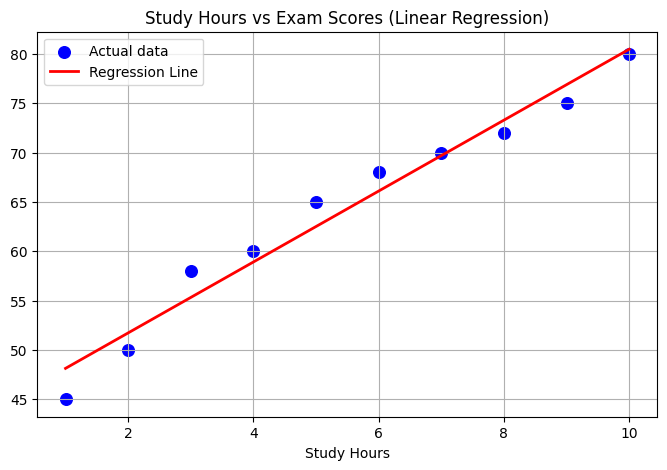

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X,Y,color="blue" , label='Actual data',s=70)
plt.plot(X,Y_pred,color='red' , linewidth=2 , label="Regression Line")

plt.title("Study Hours vs Exam Scores (Linear Regression)")
plt.xlabel("Study Hours")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
13. Build a Linear Regression model to predict students’ exam scores using study hours, attendance,
and internal marks. Validate model accuracy using K-Fold Cross-Validation. 

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("Student.csv")
print(df)



    student_id  hours_studied  sleep_hours  attendance_percent  \
0         S001            8.0          8.8                72.1   
1         S002            1.3          8.6                60.7   
2         S003            4.0          8.2                73.7   
3         S004            3.5          4.8                95.1   
4         S005            9.1          6.4                89.8   
..         ...            ...          ...                 ...   
195       S196           10.5          5.4                94.0   
196       S197            7.1          6.1                85.1   
197       S198            1.6          6.9                63.8   
198       S199           12.0          7.3                50.5   
199       S200           10.2          6.3                97.4   

     Internal_marks  exam_score  
0                45        30.2  
1                55        25.0  
2                86        35.8  
3                66        34.0  
4                71        40.3  
.. 

In [39]:
X=df[['hours_studied','attendance_percent','Internal_marks']]
y=df['exam_score']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (160, 3)  Test shape: (40, 3)


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nIntercept (c):", model.intercept_)
print("Coefficients (m):", model.coef_)

# -------------------------------------------------------
# Step 5: Evaluate on Test Set
# -------------------------------------------------------
y_pred_test = model.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
print("\n--- Test Set Performance ---")
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")


Intercept (c): 4.52343252168837
Coefficients (m): [1.58507318 0.11238446 0.16302299]

--- Test Set Performance ---
R² Score: 0.792
Mean Squared Error: 11.048


In [63]:
k = 5  # Number of folds
n = len(X)
fold_size = n // k
r2_scores = []

print(f"\nManual K-Fold Cross-Validation (k={k}) Results:")

for i in range(k):
    # Split data manually
    start = i * fold_size
    end = (i + 1) * fold_size

    X_test_fold = X.iloc[start:end]
    y_test_fold = y.iloc[start:end]
    X_train_fold = pd.concat([X.iloc[:start], X.iloc[end:]])
    y_train_fold = pd.concat([y.iloc[:start], y.iloc[end:]])

    # Train model on fold
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Predict
    y_pred_fold = model.predict(X_test_fold)
    
    r2_fold=r2_score(y_test_fold,y_pred_fold)

    r2_scores.append(r2_fold)

    print(f"Fold {i+1}: R² = {r2_fold:.3f}")

print("\nAverage R² Score (K-Fold):", round(np.mean(r2_scores), 3))


Manual K-Fold Cross-Validation (k=5) Results:
Fold 1: R² = 0.718
Fold 2: R² = 0.790
Fold 3: R² = 0.842
Fold 4: R² = 0.769
Fold 5: R² = 0.821

Average R² Score (K-Fold): 0.788


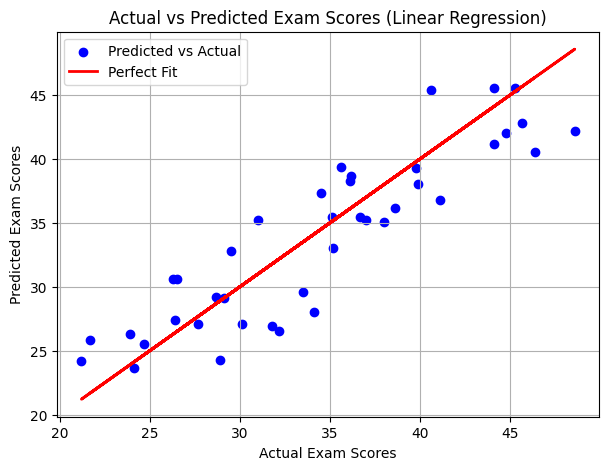

In [53]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted vs Actual')
plt.plot(y_test,y_test ,
         color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
14. Develop a Linear Regression model to estimate IT professionals’ salaries based on experience,
education, and skills. Evaluate performance using 5-Fold Cross-Validation. 

In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [69]:
data=pd.read_csv("Salary Data.csv")
data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [71]:
data.shape

(375, 6)

In [73]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [75]:
# Check for missing values
print("Missing values before handling:")
print(data.isnull().sum())


data = data.dropna()


print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values before handling:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

Missing values after handling:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [77]:
le1=LabelEncoder()
le2=LabelEncoder()

data["Education Level"]=le1.fit_transform(data["Education Level"])
data["Job Title"]=le2.fit_transform(data["Job Title"])


In [79]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,0,159,5.0,90000.0
1,28.0,Female,1,17,3.0,65000.0
2,45.0,Male,2,130,15.0,150000.0
3,36.0,Female,0,101,7.0,60000.0
4,52.0,Male,1,22,20.0,200000.0


In [81]:
X=data[["Education Level","Job Title","Years of Experience"]]
y=data["Salary"]


In [83]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X_Scaled, y, random_state=42, test_size=0.2
)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)




In [87]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Evaluation on Test Data:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 2))


 Linear Regression Evaluation on Test Data:
Mean Squared Error (MSE): 255188684.52
Root Mean Squared Error (RMSE): 15974.63
R² Score: 0.89


In [99]:
# -------------------------------------------------------
# Step 6: Validate Model Accuracy using K-Fold (From Scratch)
# -------------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

k = 5  # Number of folds
n = len(X_Scaled)
fold_size = n // k
r2_scores = []
mse_scores = []

print(f"\nManual K-Fold Cross-Validation (k={k}) Results:")

for i in range(k):
    # ----------------------------------------------
    # Step 6.1: Split data manually for fold i
    # ----------------------------------------------
    start = i * fold_size
    end = (i + 1) * fold_size

    X_test = X.iloc[start:end]
    y_test = y.iloc[start:end]

    X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
    y_train = pd.concat([y.iloc[:start], y.iloc[end:]])

    # ----------------------------------------------
    # Step 6.2: Train Linear Regression model
    # ----------------------------------------------
    model = LinearRegression()
    model.fit(X_train, y_train)

    # ----------------------------------------------
    # Step 6.3: Predict and Evaluate using sklearn metrics
    # ----------------------------------------------
    y_pred = model.predict(X_test)

    #mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {i+1}: MSE = {mse:.2f}, R² = {r2:.3f}")

# -------------------------------------------------------
# Step 6.4: Display average performance across folds
# -------------------------------------------------------
print("\nAverage Cross-Validation Results:")
#print(f"Mean MSE: {np.mean(mse_scores):.2f}")
print(f"Mean R² Score: {np.mean(r2_scores):.3f}")



Manual K-Fold Cross-Validation (k=5) Results:

Average Cross-Validation Results:
Mean R² Score: 0.863


In [91]:
16. Apply the Naïve Bayes algorithm to a real-world classification problem such as email spam
detection, sentiment analysis, or disease diagnosis. Train and test the model, then evaluate its
performance using a Confusion Matrix and related metrics such as accuracy, precision, recall, and
F1-score. 


SyntaxError: invalid syntax (939661729.py, line 1)

In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
data=pd.read_csv("emails.csv")
data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [284]:
data.shape

(5172, 3002)

In [285]:
data=data.drop(['Email No.'],axis=1)

In [286]:
data=data.sample(n=1500,random_state=42).reset_index(drop=True)

In [290]:
# Separate input features (X) and output label (y)
X = data.drop('Prediction', axis=1).astype(np.float32).values
y = data['Prediction'].astype(int).values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (1200, 3000)
Testing shape: (300, 3000)


In [293]:
import numpy as np
class naiveBayesFromScratch:
    def fit(self,X,y,alpha=1.0):
        self.classes=np.unique(y)
        n_samples,n_features=X.shape

        self.class_feature_count=np.zeros((len(self.classes)),n_features)
        self.class_count=np.zeros(len(self.classes))

        for idx,c in enumerate(self.classes):
            X_c=X[y==c]
            self.class_feature_count[idx,:]=X_c.sum(axis=0)
            self.class_count[idx]=X_c.shape[0]

        self.class_priors=self.class_count/n_samples

        #P(xi/c)

        self.feature_log_prob=np.log((self.class_feature_count+alpha)/(self.class_feature_count.sum(axis=1).reshape(-1,1)+alpha*n_features))

    #log_prior+log_likelihood(xi*P(xi/c))
    def _predict_single(self,X):
        log_posteriors=[]
        for idx,c in enumerate(self.classes):
            log_prior=np.log(self.class_priors[idx])
            log_likelihood=np.sum(X*self.feature_log_prob[idx,:])
            log_posteriors.append(log_prior+log_likelihood)
        return self.classes[np.argmax(log_posteriors)]


    def predict(self,X):
        return np.array([self._predict_single(x) for x in X])




In [295]:
# Create and train model
nb = NaiveBayesFromScratch()
nb.fit(X_train, y_train)

print("✅ Model training complete.")


✅ Model training complete.


In [297]:
# Predict on the test set
y_pred = nb.predict(X_test)

# Display few predictions
print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual Labels:", y_test[:10])


First 10 Predictions: [0 0 0 0 0 1 0 0 1 0]
First 10 Actual Labels: [0 0 0 0 0 1 0 0 1 0]


In [299]:
print("✅ Naive Bayes From Scratch Results")
print("------------------------------------")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Naive Bayes From Scratch Results
------------------------------------
Accuracy: 0.94

Confusion Matrix:
 [[195  13]
 [  5  87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       208
           1       0.87      0.95      0.91        92

    accuracy                           0.94       300
   macro avg       0.92      0.94      0.93       300
weighted avg       0.94      0.94      0.94       300



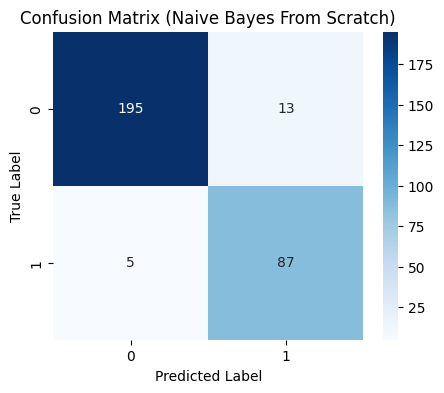

In [301]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes From Scratch)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [303]:
#Now for Sentiment dataset 16 and 17

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer


In [307]:
df=pd.read_csv("sentiment.csv")
df.head()


,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [309]:
df=df[['text','sentiment']]

In [311]:
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['sentiment'].map(label_map)



# Extract features and labels
X = df['text'].values
y = df['label'].values.astype(int)

# Train-test split (with stratify to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Cleaned dataset size:", df.shape)
print("Samples per class:\n", df['label'].value_counts())

 Cleaned dataset size: (499, 3)
Samples per class:
 label
1    199
2    166
0    134
Name: count, dtype: int64


In [313]:
vectorizer=CountVectorizer()
X_train_vec=vectorizer.fit_transform(X_train).toarray()
X_test_vec=vectorizer.transform(X_test).toarray()

print("Vocabulary size:", len(vectorizer.vocabulary_))
print("Train shape:", X_train_vec.shape, " Test shape:", X_test_vec.shape)




Vocabulary size: 1237
Train shape: (399, 1237)  Test shape: (100, 1237)


In [319]:
import numpy as np
class naiveBayesFromScratch:
    def fit(self,X,y,alpha=1.0):
        self.classes=np.unique(y)
        n_samples,n_features=X.shape

        self.class_feature_count=np.zeros((len(self.classes),n_features))
        self.class_count=np.zeros(len(self.classes))

        for idx,c in enumerate(self.classes):
            X_c=X[y==c]
            self.class_feature_count[idx,:]=X_c.sum(axis=0)
            self.class_count[idx]=X_c.shape[0]

        #P(C)

        self.class_priors=self.class_count/n_samples

        #P(xi/c)

        self.feature_log_prob=np.log((self.class_feature_count+alpha)/(self.class_feature_count.sum(axis=1).reshape(-1,1)+alpha*n_features))

    #log_prior+log_likelihood(xi*P(xi/c))
    def _predict_single(self,X):
        log_posteriors=[]
        for idx,c in enumerate(self.classes):
            log_prior=np.log(self.class_priors[idx])
            log_likelihood=np.sum(X*self.feature_log_prob[idx,:])
            log_posteriors.append(log_prior+log_likelihood)
        return int(self.classes[np.argmax(log_posteriors)])


    def predict(self,X):
        return np.array([self._predict_single(x) for x in X])




In [321]:
# Train model
nb = naiveBayesFromScratch()
nb.fit(X_train_vec, y_train, alpha=1.0)

# Predict
y_pred = nb.predict(X_test_vec)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test,
    y_pred,
    target_names=['Negative', 'Neutral', 'Positive']
))


Accuracy: 0.65

Confusion Matrix:
 [[10 16  1]
 [ 0 34  6]
 [ 2 10 21]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.37      0.51        27
     Neutral       0.57      0.85      0.68        40
    Positive       0.75      0.64      0.69        33

    accuracy                           0.65       100
   macro avg       0.72      0.62      0.63       100
weighted avg       0.70      0.65      0.64       100



In [ ]:
#Now For Disease Dataset

In [351]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [363]:
df = pd.read_csv('disease.csv')

df.head()

,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids


In [365]:
# Drop ID column (not a feature)
df = df.drop(['Patient_ID'], axis=1)

# Fill missing values
df = df.fillna('Unknown')

# Initialize LabelEncoder
le = LabelEncoder()

# Columns to encode
cat_cols = ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3', 
            'Severity', 'Treatment_Plan', 'Diagnosis']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(['Diagnosis','Blood_Pressure_mmHg'] ,axis=1).values
y = df['Diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Data Encoded & Split Successfully!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


✅ Data Encoded & Split Successfully!
Train shape: (1600, 10)
Test shape: (400, 10)


In [367]:
class MultinomialNaiveBayesScratch:
    def fit(self, X, y, alpha=1.0):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape

        # Initialize class and feature counts
        self.class_feature_count = np.zeros((len(self.classes), n_features))
        self.class_count = np.zeros(len(self.classes))

        # Count feature occurrences for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_feature_count[idx, :] = X_c.sum(axis=0)
            self.class_count[idx] = X_c.shape[0]

        # Prior probabilities P(C)
        self.class_priors = self.class_count / n_samples

        # Conditional probabilities with Laplace smoothing
        self.feature_log_prob = np.log(
            (self.class_feature_count + alpha) /
            (self.class_feature_count.sum(axis=1).reshape(-1, 1) + alpha * n_features)
        )

    def _predict_single(self, x):
        log_posteriors = []
        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.class_priors[idx])
            log_likelihood = np.sum(x * self.feature_log_prob[idx, :])
            log_posteriors.append(log_prior + log_likelihood)
        return int(self.classes[np.argmax(log_posteriors)])

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])


In [369]:
# Train model
nb = MultinomialNaiveBayesScratch()
nb.fit(X_train, y_train, alpha=1.0)

# Predict on test data
y_pred = nb.predict(X_test)

# Evaluate
print("✅ Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation Results:
Accuracy: 0.865

Confusion Matrix:
 [[ 52   0   4   0  11]
 [  0   0   0  33   0]
 [  0   0  57   0   1]
 [  0   0   1 232   0]
 [  4   0   0   0   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85        67
           1       0.00      0.00      0.00        33
           2       0.92      0.98      0.95        58
           3       0.88      1.00      0.93       233
           4       0.29      0.56      0.38         9

    accuracy                           0.86       400
   macro avg       0.60      0.66      0.62       400
weighted avg       0.81      0.86      0.83       400



D:\Anaconda Jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda Jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda Jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#18. Implementation an Email Spam Detection model using a Support Vector Machine (SVM) for
#binary classification, where emails are categorized as Normal (Not Spam) or Abnormal (Spam).
#Apply oversampling or undersampling techniques to handle class imbalance and analyze model
#performance using appropriate evaluation metrics.

In [27]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


Shape: (5172, 3001)

Class Distribution:
 Prediction
0    3672
1    1500
Name: count, dtype: int64


C:\Users\mehul\AppData\Local\Temp\ipykernel_25824\974320911.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prediction', data=data, palette='Set2')


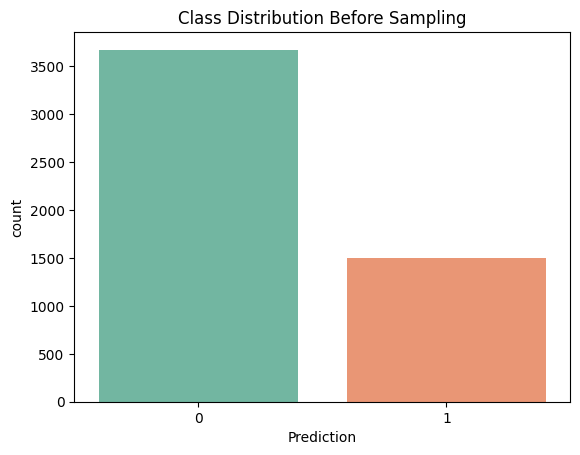

In [29]:
# Step 2: Load dataset
data = pd.read_csv("emails.csv")

# Drop unnecessary columns
data = data.drop(['Email No.'], axis=1)

# Inspect dataset
print("Shape:", data.shape)
print("\nClass Distribution:\n", data['Prediction'].value_counts())

# Visualize initial class distribution
sns.countplot(x='Prediction', data=data, palette='Set2')
plt.title("Class Distribution Before Sampling")
plt.show()


In [31]:
# Step 3: Split data into features and target
X = data.drop('Prediction', axis=1)
y = data['Prediction']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before Sampling:")
print(y_train.value_counts())


Before Sampling:
Prediction
0    2937
1    1200
Name: count, dtype: int64


After SMOTE Oversampling:
Prediction
0    2937
1    2937
Name: count, dtype: int64


C:\Users\mehul\AppData\Local\Temp\ipykernel_25824\2794634887.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_bal, palette='cool')


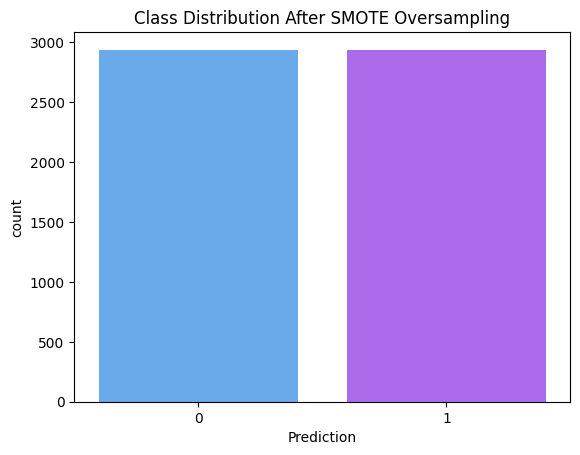

In [33]:
# Step 4: Apply SMOTE for oversampling minority class
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("After SMOTE Oversampling:")
print(y_train_bal.value_counts())

# Visualize class distribution after SMOTE
sns.countplot(x=y_train_bal, palette='cool')
plt.title("Class Distribution After SMOTE Oversampling")
plt.show()


In [7]:
#undersampler=RandomUnderSampler(random_state=42)
#X_train_bal,y_train_bal=undersampler.fit_resample(X_train,y_train)


In [10]:
#y_train_bal.value_counts()

In [35]:
# Step 5: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


In [37]:
# Step 6: Convert labels for hinge loss
y_train_bal_ = np.where(y_train_bal <= 0, -1, 1)
y_test_ = np.where(y_test <= 0, -1, 1)


In [39]:
# Step 7: Define SVM class (same structure and logic as Q19)

class SVMfromScratch:
    def __init__(self, learning_rate=0.0001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate        # learning rate
        self.lambda_param = lambda_param  # regularization (1/C)
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # correctly classified → apply regularization only
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # misclassified → apply hinge loss gradient
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [41]:
# Step 8: Train the model (same as 19)
svm_model = SVMfromScratch(learning_rate=0.0001, lambda_param=0.01, n_iters=100)
svm_model.fit(X_train_scaled, y_train_bal_)


In [43]:
# Step 9: Prediction
y_pred = svm_model.predict(X_test_scaled)

# Convert {-1,1} back to {0,1}
y_pred_final = np.where(y_pred == -1, 0, 1)


----- Custom SVM (from scratch) Performance -----
Accuracy: 94.97584541062803

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       735
           1       0.87      0.98      0.92       300

    accuracy                           0.95      1035
   macro avg       0.93      0.96      0.94      1035
weighted avg       0.95      0.95      0.95      1035


Confusion Matrix:
 [[690  45]
 [  7 293]]


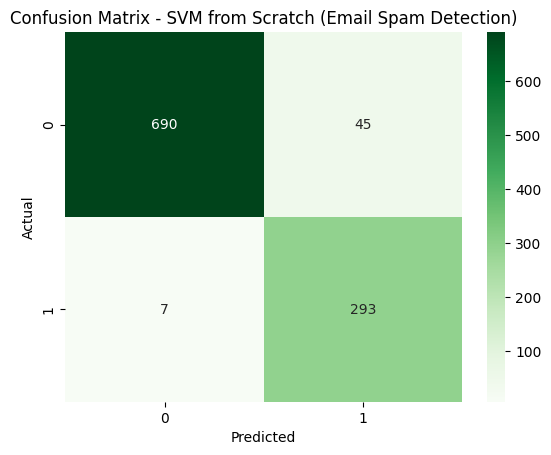

In [45]:
# Step 10: Evaluation of performance
print("----- Custom SVM (from scratch) Performance -----")
print("Accuracy:", accuracy_score(y_test, y_pred_final)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

# Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM from Scratch (Email Spam Detection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [54]:
#19. Implement an Email Spam Detection model from scratch using the Support Vector Machine
#(SVM) algorithm for binary classification, where emails are labeled as Normal (Not Spam) or
#Abnormal (Spam). Analyze model performance using appropriate evaluation metrics. 



In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [12]:
data=pd.read_csv("emails.csv")

data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data.shape

(5172, 3002)

In [16]:
data = data.drop(['Email No.'], axis=1)

X=data.drop('Prediction',axis=1).values
y=data['Prediction'].values

y=np.where(y==0,-1,1)

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [18]:
class SVMfromScratch:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,n_iters=100):
        self.lr=learning_rate
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None
    
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.w=np.zeros(n_features)
        self.b=0

        for _ in range(self.n_iters):
            for idx,x_i in enumerate(X):
                condition=y[idx]*(np.dot(x_i,self.w)-self.b)>=1


                if condition:
                    self.w-=self.lr*(2*self.lambda_param*self.w)
                else:
                    self.w=self.w-self.lr*(2*self.lambda_param*self.w-np.dot(x_i,y[idx]))
                    self.b-=self.lr*y[idx]

    def predict(self,X):
        approx=np.dot(X,self.w)-self.b
        return np.sign(approx)



In [20]:
svm=SVMfromScratch()
svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)

y_test_eval=np.where(y_test==-1,0,1)
y_pred_eval=np.where(y_pred==-1,0,1)





In [22]:
acc = accuracy_score(y_test_eval, y_pred_eval)
cm = confusion_matrix(y_test_eval, y_pred_eval)
cr = classification_report(y_test_eval, y_pred_eval)

print(f"Accuracy: {acc*100:.2f}%\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Accuracy: 97.49%

Confusion Matrix:
 [[716  19]
 [  7 293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       735
           1       0.94      0.98      0.96       300

    accuracy                           0.97      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.98      0.97      0.98      1035



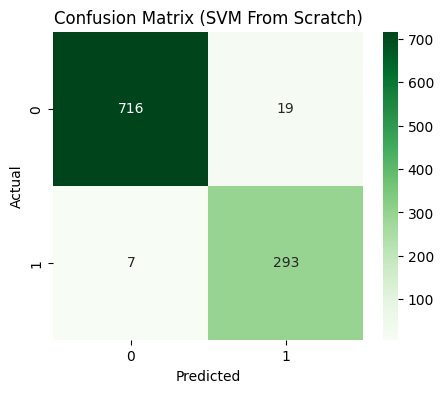

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.title("Confusion Matrix (SVM From Scratch)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
20. Implement an SVM model from scratch with a Polynomial Kernel to predict student performance
(Pass/Fail) using the Student Performance Dataset based on features like study time, absences,
and internal scores. Assess the model performance using precision, recall, and F1-score. 


In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [139]:
# Load dataset
data = pd.read_csv("student_performance.csv")

# Display first few rows
data.head()


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Internal_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [135]:
data.shape

(708, 10)

In [145]:
# Keep only relevant features
data = data[[
    "Study_Hours_per_Week",
    "Attendance_Rate",
    "Internal_Scores",
    "Pass_Fail"
]]

# Encode target variable (Pass=1, Fail=0)
le_passfail = LabelEncoder()
data["Pass_Fail"] = le_passfail.fit_transform(data["Pass_Fail"])

# Check data
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (708, 4)


,Study_Hours_per_Week,Attendance_Rate,Internal_Scores,Pass_Fail
0,31,68.267841,86,1
1,16,78.222927,73,0
2,21,87.525096,74,0
3,27,92.076483,99,1
4,37,98.655517,63,1


In [147]:
# Define X (features) and y (target)
X = data[["Study_Hours_per_Week", "Attendance_Rate", "Internal_Scores"]].values
y = data["Pass_Fail"].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (566, 3)
Test shape: (142, 3)


In [149]:
# -------------------------------------------------------
# Step 3: Define Polynomial Kernel
# -------------------------------------------------------
def polynomial_kernel(X1, X2, degree=3, c=1):
    return (np.dot(X1, X2.T) + c) ** degree


In [151]:
# -------------------------------------------------------
# Step 4: Define SVM Class with Polynomial Kernel (From Scratch)
# -------------------------------------------------------
class SVMPolynomial:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000, degree=3, c=1):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.degree = degree
        self.c = c

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # convert 0 → -1
        self.alpha = np.zeros(n_samples)
        self.K = polynomial_kernel(X, X, self.degree, self.c)

        # Training loop
        for _ in range(self.n_iters):
            for i in range(n_samples):
                condition = y_[i] * (np.sum(self.alpha * y_ * self.K[:, i])) >= 1
                if condition:
                    self.alpha[i] -= self.lr * (2 * self.lambda_param * self.alpha[i])
                else:
                    self.alpha[i] += self.lr * (1 - y_[i] * np.sum(self.alpha * y_ * self.K[:, i]))

        self.X_train = X
        self.y_train = y_

    def project(self, X):
        K = polynomial_kernel(X, self.X_train, self.degree, self.c)
        return np.dot(K, self.alpha * self.y_train)

    def predict(self, X):
        pred = self.project(X)
        return np.sign(pred)


In [153]:
# Initialize and train model (degree=3 polynomial)
svm_poly = SVMPolynomial(learning_rate=0.001, lambda_param=0.01, n_iters=100, degree=2, c=1)
svm_poly.fit(X_train, y_train)

print("✅ Training complete using Study Hours, Attendance Rate, and Internal Scores.")


✅ Training complete using Study Hours, Attendance Rate, and Internal Scores.


In [155]:
# Predict test set
y_pred = svm_poly.predict(X_test)

# Convert {-1,1} → {0,1}
y_pred = np.where(y_pred == -1, 0, 1)

# Evaluate
print("✅ SVM Polynomial Kernel Evaluation Results")
print("--------------------------------------------")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ SVM Polynomial Kernel Evaluation Results
--------------------------------------------
Accuracy: 0.831

Confusion Matrix:
 [[57 14]
 [10 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83        71
           1       0.81      0.86      0.84        71

    accuracy                           0.83       142
   macro avg       0.83      0.83      0.83       142
weighted avg       0.83      0.83      0.83       142



In [ ]:
21. Develop an SVM classifier from scratch using a Polynomial Kernel on the Breast Cancer
Wisconsin Dataset to distinguish between benign and malignant tumors.
Evaluate the classifier using a confusion matrix and ROC curve to analyze diagnostic accuracy.

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt


In [69]:
data=pd.read_csv("brca.csv")

data.head()


,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [71]:
data.columns

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [73]:
data['y'].nunique()

2

In [75]:
data['y']=data['y'].map({'M':1,'B':0})

In [77]:
X=data.drop(columns=['y']).values
y=data['y'].values

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Data Loaded Sucessfully!")
print("training Samples: ",X_train.shape[0])
print("Testing Samples: ",X_test.shape[0])


Data Loaded Sucessfully!
training Samples:  455
Testing Samples:  114


In [81]:
def polynomial_kernel(X1,X2,degrees=2,c=1):
    return (np.dot(X1,X2.T)+c)**degrees



In [101]:
# -------------------------------------------------------
# Step 4: Define SVM Class with Polynomial Kernel (From Scratch)
# -------------------------------------------------------
class SVMPolynomial:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000, degree=2, c=1):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.degree = degree
        self.c = c

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # convert 0 → -1
        self.alpha = np.zeros(n_samples)
        self.K = polynomial_kernel(X, X, self.degree, self.c)

        for _ in range(self.n_iters):
            for i in range(n_samples):
                condition = y_[i] * (np.sum(self.alpha * y_ * self.K[:, i])) >= 1
                if condition:
                    self.alpha[i] -= self.lr * (2 * self.lambda_param * self.alpha[i])
                else:
                    self.alpha[i] += self.lr * (1 - y_[i] * np.sum(self.alpha * y_ * self.K[:, i]))

        self.X_train = X
        self.y_train = y_

    def project(self, X):
        K = polynomial_kernel(X, self.X_train, self.degree, self.c)
        return np.dot(K, self.alpha * self.y_train)

    def predict(self, X):
        pred = self.project(X)
        return np.sign(pred)


In [103]:
# -------------------------------------------------------
# Step 5: Train SVM Model using Polynomial Kernel
# -------------------------------------------------------
svm_poly = SVMPolynomial(learning_rate=0.001, lambda_param=0.01, n_iters=100, degree=2, c=1)
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)

# Convert {-1, 1} → {0, 1}
y_pred = np.where(y_pred == -1, 0, 1)

print("✅ Model training completed successfully!")


✅ Model training completed successfully!


In [105]:
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[71  0]
 [ 3 40]]


In [118]:
accuracy = np.mean(y_pred == y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 97.37%


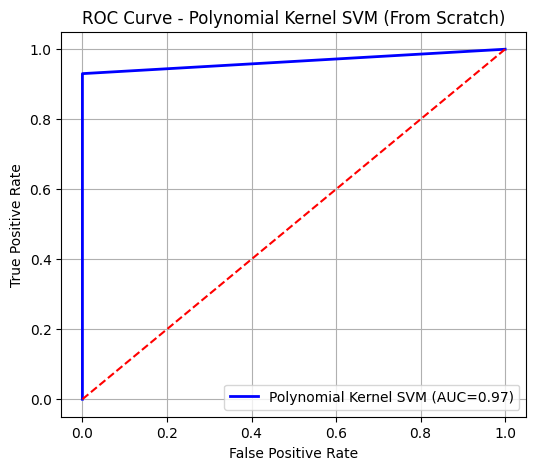

In [116]:
fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,color='blue',lw=2,label=f"Polynomial Kernel SVM (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.title('ROC Curve - Polynomial Kernel SVM (From Scratch)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()




